In [3]:
# Essential libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No width limit
pd.set_option('display.max_colwidth', 50)  # Limit column width

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')  # Clean white grid background
sns.set_palette('husl')  # Colorful palette for plots

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")

 All libraries imported successfully!
 Pandas version: 2.2.2
 NumPy version: 1.26.4


In [5]:
# Load the Chocolate Sales Dataset

# Define the file path to our dataset
file_path = "C:\\Users\\indie\\Downloads\\archive (2)\\Chocolate Sales (2).csv"

# Read the CSV file into a pandas DataFrame
# The read_csv() function automatically detects delimiters and headers
df = pd.read_csv(file_path)

# Display basic information about the loaded data
print("CHOCOLATE SALES DATASET LOADED SUCCESSFULLY!")
print("=" * 50)
print(f"\n Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

CHOCOLATE SALES DATASET LOADED SUCCESSFULLY!

 Dataset Shape: 3282 rows × 6 columns

Column Names:
   1. Sales Person
   2. Country
   3. Product
   4. Date
   5. Amount
   6. Boxes Shipped


In [9]:
print(" FIRST 5 ROWS OF THE DATASET:")
print("-" * 50)
df.head()

 FIRST 5 ROWS OF THE DATASET:
--------------------------------------------------


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [11]:
print("LAST 5 ROWS OF THE DATASET:")
print("-" * 50)
df.tail()

LAST 5 ROWS OF THE DATASET:
--------------------------------------------------


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397
3281,Karlen McCaffrey,India,70% Dark Bites,23/05/2024,"$5,915.87",355


In [13]:
print(" DATASET INFORMATION:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\n DATA TYPES SUMMARY:")
print(df.dtypes)

 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


 DATA TYPES SUMMARY:
Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


In [15]:
#check for missing values
print(" MISSING VALUES CHECK:")
print("=" * 50)

# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)
print("\n MISSING VALUES PERCENTAGE:")
print(missing_percentage)

# Summary
total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("\n Great news! No missing values found in the dataset!")
else:
    print(f"\n⚠ Total missing values: {total_missing}")

 MISSING VALUES CHECK:
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

 MISSING VALUES PERCENTAGE:
Sales Person     0.0
Country          0.0
Product          0.0
Date             0.0
Amount           0.0
Boxes Shipped    0.0
dtype: float64

 Great news! No missing values found in the dataset!


In [17]:
print(" CLEANING AMOUNT COLUMN:")
print("=" * 50)

# Display original format
print(f"Original format: {df['Amount'].iloc[0]}")

# Remove '$' symbol and ',' from the Amount column
# str.replace() replaces specified characters with empty string
df['Amount'] = df['Amount'].str.replace('$', '', regex=False)  # Remove $ sign
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)  # Remove commas

# Convert to float for numerical operations
df['Amount'] = df['Amount'].astype(float)

# Verify the conversion
print(f"Cleaned format: {df['Amount'].iloc[0]}")
print(f"\n Amount column data type: {df['Amount'].dtype}")
print(f" Amount range: ${df['Amount'].min():,.2f} - ${df['Amount'].max():,.2f}")

 CLEANING AMOUNT COLUMN:
Original format: $5,320.00
Cleaned format: 5320.0

 Amount column data type: float64
 Amount range: $7.00 - $26,170.95


In [19]:
#  Convert Date Column to Datetime Format
# pd.to_datetime() converts string dates to datetime objects
# dayfirst=True indicates the day comes before month (DD/MM/YYYY format)

print(" CONVERTING DATE COLUMN:")
print("=" * 50)

# Display original format
print(f"Original format: {df['Date'].iloc[0]} (type: {df['Date'].dtype})")

# Convert to datetime - the data uses DD/MM/YYYY format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Verify conversion
print(f"Converted format: {df['Date'].iloc[0]} (type: {df['Date'].dtype})")

# Extract additional time-based features for analysis
df['Month'] = df['Date'].dt.month          # Month number (1-12)
df['Month_Name'] = df['Date'].dt.month_name()  # Month name (January, February, etc.)
df['Quarter'] = df['Date'].dt.quarter      # Quarter (1-4)
df['Day_of_Week'] = df['Date'].dt.day_name()   # Day name (Monday, Tuesday, etc.)

print("\n Date column converted successfully!")
print(f" Date range: {df['Date'].min().strftime('%B %d, %Y')} to {df['Date'].max().strftime('%B %d, %Y')}")

 CONVERTING DATE COLUMN:
Original format: 04/01/2022 (type: object)
Converted format: 2022-01-04 00:00:00 (type: datetime64[ns])

 Date column converted successfully!
 Date range: January 03, 2022 to August 31, 2024


In [21]:
# 🔄 Check for Duplicate Records
# duplicated() returns boolean Series marking duplicate rows
# Keeping duplicates can skew analysis results

print(" CHECKING FOR DUPLICATES:")
print("=" * 50)

# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\n⚠ Found {duplicates} duplicate rows!")
    print("Removing duplicates...")
    df = df.drop_duplicates()
    print(f" Duplicates removed. New shape: {df.shape}")
else:
    print("\n No duplicate records found!")

# Display cleaned dataset info
print(f"\n Final Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

 CHECKING FOR DUPLICATES:
Number of duplicate rows: 0

 No duplicate records found!

 Final Dataset Shape: 3282 rows × 10 columns


In [23]:
print("📋 CLEANED DATASET PREVIEW:")
print("=" * 50)
df.head()

📋 CLEANED DATASET PREVIEW:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Month_Name,Quarter,Day_of_Week
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,1,January,1,Tuesday
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,8,August,3,Monday
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,7,July,3,Thursday
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,4,April,2,Wednesday
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2,February,1,Thursday


In [25]:
#  Summary Statistics for Numerical Columns


print(" SUMMARY STATISTICS (NUMERICAL COLUMNS):")
print("=" * 60)

# Get statistics for numerical columns only
numerical_stats = df[['Amount', 'Boxes Shipped']].describe()

# Format the output for better readability
print(numerical_stats.round(2))

print("\n KEY INSIGHTS:")
print(f"    Average Sale Amount: ${df['Amount'].mean():,.2f}")
print(f"    Median Sale Amount: ${df['Amount'].median():,.2f}")
print(f"    Average Boxes Shipped: {df['Boxes Shipped'].mean():,.0f}")
print(f"    Median Boxes Shipped: {df['Boxes Shipped'].median():,.0f}")

 SUMMARY STATISTICS (NUMERICAL COLUMNS):
         Amount  Boxes Shipped
count   3282.00        3282.00
mean    6030.34         164.67
std     4393.98         124.02
min        7.00           1.00
25%     2521.50          71.00
50%     5225.50         137.00
75%     8556.84         232.00
max    26170.95         778.00

 KEY INSIGHTS:
    Average Sale Amount: $6,030.34
    Median Sale Amount: $5,225.50
    Average Boxes Shipped: 165
    Median Boxes Shipped: 137


In [27]:
print(" UNIQUE VALUES COUNT:")
print("=" * 50)

# Categorical columns to analyze
categorical_cols = ['Sales Person', 'Country', 'Product']

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"   {col}: {unique_count} unique values")

print("\n📋 ADDITIONAL INFO:")
print(f"    Number of unique dates: {df['Date'].nunique()}")
print(f"    Number of months covered: {df['Month'].nunique()}")

 UNIQUE VALUES COUNT:
   Sales Person: 25 unique values
   Country: 6 unique values
   Product: 22 unique values

📋 ADDITIONAL INFO:
    Number of unique dates: 504
    Number of months covered: 8


In [29]:
#  Country Distribution
# value_counts() counts frequency of each unique value
# Helps understand geographical distribution of sales

print(" SALES BY COUNTRY:")
print("=" * 50)

country_counts = df['Country'].value_counts()
print(country_counts)

# Calculate percentage
print("\n PERCENTAGE DISTRIBUTION:")
country_pct = (df['Country'].value_counts(normalize=True) * 100).round(2)
for country, pct in country_pct.items():
    print(f"   {country}: {pct}%")

 SALES BY COUNTRY:
Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64

 PERCENTAGE DISTRIBUTION:
   Australia: 18.74%
   India: 16.82%
   USA: 16.36%
   UK: 16.27%
   Canada: 16.0%
   New Zealand: 15.81%


In [31]:
#  Product Distribution
# Analyze which chocolate products are sold most frequently

print(" SALES BY PRODUCT:")
print("=" * 50)

product_counts = df['Product'].value_counts()
print(product_counts)

print("\n TOP 5 PRODUCTS BY FREQUENCY:")
for i, (product, count) in enumerate(product_counts.head().items(), 1):
    print(f"   {i}. {product}: {count} sales")

 SALES BY PRODUCT:
Product
50% Dark Bites          180
Eclairs                 180
Smooth Sliky Salty      177
White Choc              174
Drinking Coco           168
Spicy Special Slims     162
Organic Choco Syrup     156
After Nines             150
85% Dark Bars           150
Fruit & Nut Bars        150
Milk Bars               147
Peanut Butter Cubes     147
99% Dark & Pure         147
Almond Choco            144
Raspberry Choco         144
Orange Choco            141
Mint Chip Choco         135
Manuka Honey Choco      135
Caramel Stuffed Bars    129
70% Dark Bites          126
Baker's Choco Chips     123
Choco Coated Almonds    117
Name: count, dtype: int64

 TOP 5 PRODUCTS BY FREQUENCY:
   1. 50% Dark Bites: 180 sales
   2. Eclairs: 180 sales
   3. Smooth Sliky Salty: 177 sales
   4. White Choc: 174 sales
   5. Drinking Coco: 168 sales


In [33]:
#  Sales Person Distribution
# Analyze sales activity by each sales person

print(" SALES BY SALES PERSON:")
print("=" * 50)

person_counts = df['Sales Person'].value_counts()
print(person_counts)

print("\n TOP 5 MOST ACTIVE SALES PERSONS:")
for i, (person, count) in enumerate(person_counts.head().items(), 1):
    print(f"   {i}. {person}: {count} sales")

 SALES BY SALES PERSON:
Sales Person
Kelci Walkden          162
Brien Boise            159
Van Tuxwell            153
Beverie Moffet         150
Dennison Crosswaite    147
Oby Sorrel             147
Ches Bonnell           144
Karlen McCaffrey       141
Gigi Bohling           141
Curtice Advani         138
Kaine Padly            135
Madelene Upcott        135
Marney O'Breen         135
Barr Faughny           129
Jehu Rudeforth         129
Roddy Speechley        129
Gunar Cockshoot        129
Mallorie Waber         123
Jan Morforth           117
Andria Kimpton         117
Husein Augar           114
Dotty Strutley         108
Wilone O'Kielt         102
Rafaelita Blaksland    102
Camilla Castle          96
Name: count, dtype: int64

 TOP 5 MOST ACTIVE SALES PERSONS:
   1. Kelci Walkden: 162 sales
   2. Brien Boise: 159 sales
   3. Van Tuxwell: 153 sales
   4. Beverie Moffet: 150 sales
   5. Dennison Crosswaite: 147 sales


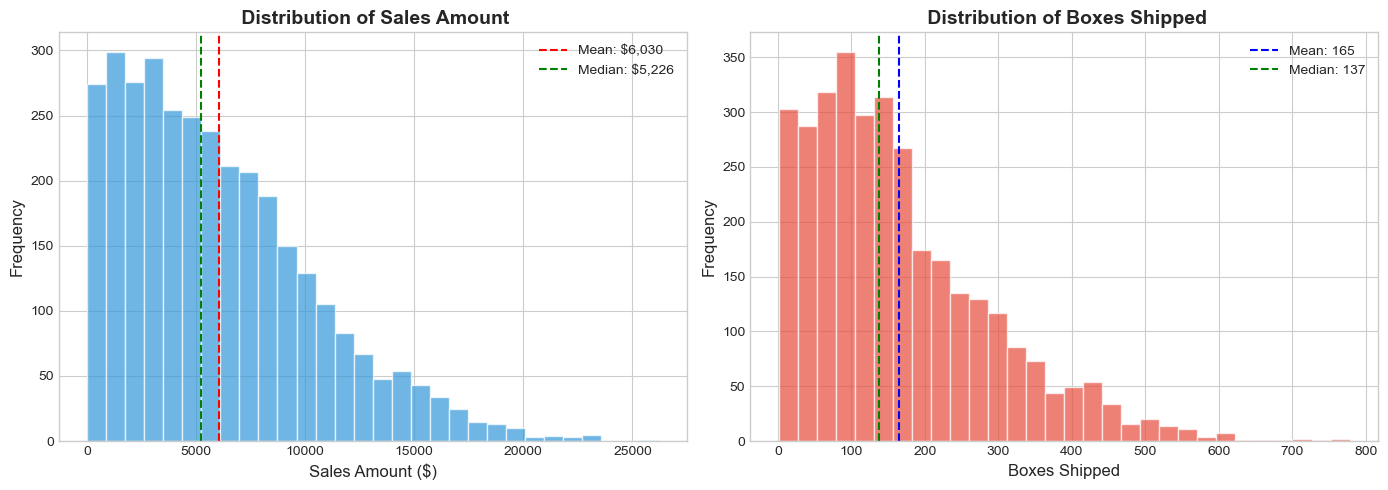


 INTERPRETATION:
   • Sales Amount shows right-skewed distribution (most sales are smaller)
   • Boxes Shipped also shows right-skewed pattern
   • The difference between mean and median indicates skewness


In [35]:
# EDA 

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Amount
axes[0].hist(df['Amount'], bins=30, color='#3498db', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Sales Amount ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(' Distribution of Sales Amount', fontsize=14, fontweight='bold')
axes[0].axvline(df['Amount'].mean(), color='red', linestyle='--', label=f"Mean: ${df['Amount'].mean():,.0f}")
axes[0].axvline(df['Amount'].median(), color='green', linestyle='--', label=f"Median: ${df['Amount'].median():,.0f}")
axes[0].legend()

# Histogram for Boxes Shipped
axes[1].hist(df['Boxes Shipped'], bins=30, color='#e74c3c', edgecolor='white', alpha=0.7)
axes[1].set_xlabel('Boxes Shipped', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title(' Distribution of Boxes Shipped', fontsize=14, fontweight='bold')
axes[1].axvline(df['Boxes Shipped'].mean(), color='blue', linestyle='--', label=f"Mean: {df['Boxes Shipped'].mean():,.0f}")
axes[1].axvline(df['Boxes Shipped'].median(), color='green', linestyle='--', label=f"Median: {df['Boxes Shipped'].median():,.0f}")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n INTERPRETATION:")
print("   • Sales Amount shows right-skewed distribution (most sales are smaller)")
print("   • Boxes Shipped also shows right-skewed pattern")
print("   • The difference between mean and median indicates skewness")

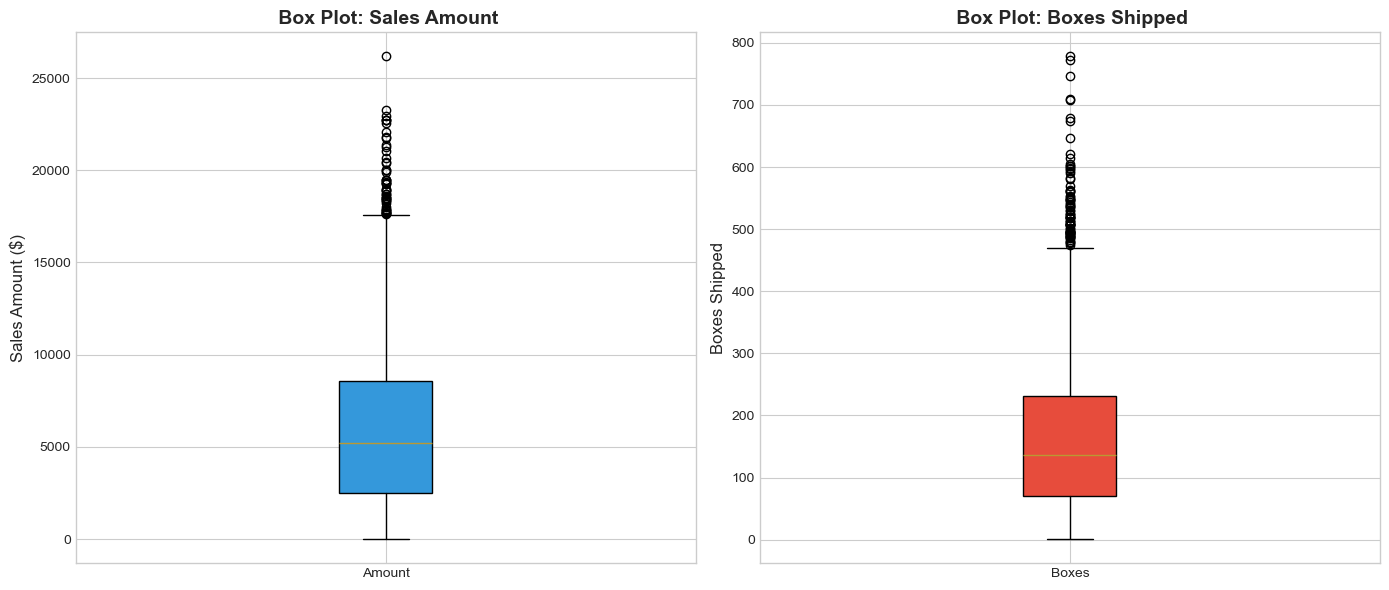


 OUTLIER ANALYSIS (Amount):
   Q1: $2,521.49
   Q3: $8,556.84
   IQR: $6,035.35
   Number of outliers: 50


In [37]:
# Check for Outliers 


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Amount
box1 = axes[0].boxplot(df['Amount'], patch_artist=True)
box1['boxes'][0].set_facecolor('#3498db')
axes[0].set_ylabel('Sales Amount ($)', fontsize=12)
axes[0].set_title(' Box Plot: Sales Amount', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Amount'])

# Box plot for Boxes Shipped
box2 = axes[1].boxplot(df['Boxes Shipped'], patch_artist=True)
box2['boxes'][0].set_facecolor('#e74c3c')
axes[1].set_ylabel('Boxes Shipped', fontsize=12)
axes[1].set_title(' Box Plot: Boxes Shipped', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Boxes'])

plt.tight_layout()
plt.show()

# Calculate outlier statistics using IQR method
Q1_amount = df['Amount'].quantile(0.25)
Q3_amount = df['Amount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount

outliers_amount = df[(df['Amount'] < Q1_amount - 1.5*IQR_amount) | (df['Amount'] > Q3_amount + 1.5*IQR_amount)]

print("\n OUTLIER ANALYSIS (Amount):")
print(f"   Q1: ${Q1_amount:,.2f}")
print(f"   Q3: ${Q3_amount:,.2f}")
print(f"   IQR: ${IQR_amount:,.2f}")
print(f"   Number of outliers: {len(outliers_amount)}")

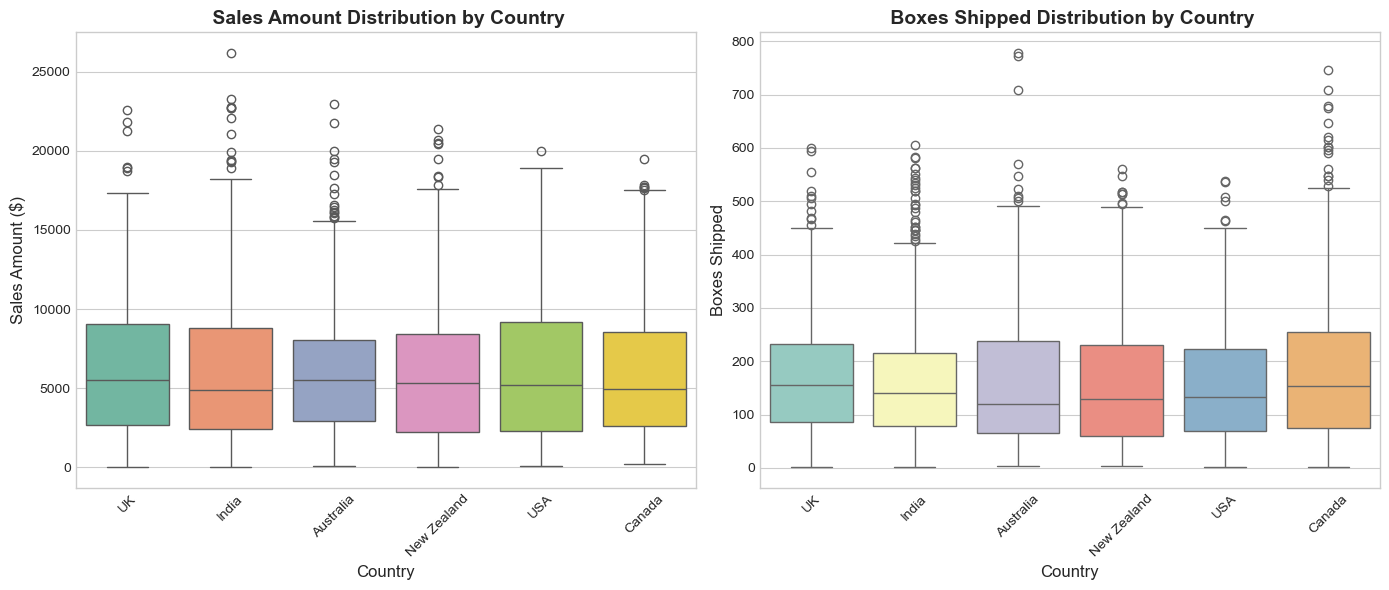


 INTERPRETATION:
   • Box plots show variation in sales performance across countries
   • Median values (center line) indicate typical sales for each country
   • Width of boxes shows spread of middle 50% of data


In [39]:
# Box Plots by Country 


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot: Amount by Country
sns.boxplot(data=df, x='Country', y='Amount', palette='Set2', ax=axes[0])
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Sales Amount ($)', fontsize=12)
axes[0].set_title(' Sales Amount Distribution by Country', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Box plot: Boxes Shipped by Country
sns.boxplot(data=df, x='Country', y='Boxes Shipped', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Boxes Shipped', fontsize=12)
axes[1].set_title(' Boxes Shipped Distribution by Country', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n INTERPRETATION:")
print("   • Box plots show variation in sales performance across countries")
print("   • Median values (center line) indicate typical sales for each country")
print("   • Width of boxes shows spread of middle 50% of data")

In [40]:
#  Correlation Matrix


# Select numerical columns for correlation analysis
numerical_cols = ['Amount', 'Boxes Shipped', 'Month', 'Quarter']
correlation_matrix = df[numerical_cols].corr()

print(" CORRELATION MATRIX:")
print("=" * 50)
print(correlation_matrix.round(3))

# Key correlation interpretation
amount_boxes_corr = correlation_matrix.loc['Amount', 'Boxes Shipped']
print(f"\n Correlation between Amount and Boxes Shipped: {amount_boxes_corr:.3f}")

if amount_boxes_corr > 0.5:
    print("    Strong positive correlation - as one increases, the other tends to increase")
elif amount_boxes_corr > 0.3:
    print("    Moderate positive correlation")
elif amount_boxes_corr > 0:
    print("    Weak positive correlation")
else:
    print("    Negative or no correlation")

 CORRELATION MATRIX:
               Amount  Boxes Shipped  Month  Quarter
Amount          1.000         -0.013 -0.053   -0.048
Boxes Shipped  -0.013          1.000 -0.057   -0.041
Month          -0.053         -0.057  1.000    0.941
Quarter        -0.048         -0.041  0.941    1.000

 Correlation between Amount and Boxes Shipped: -0.013
    Negative or no correlation


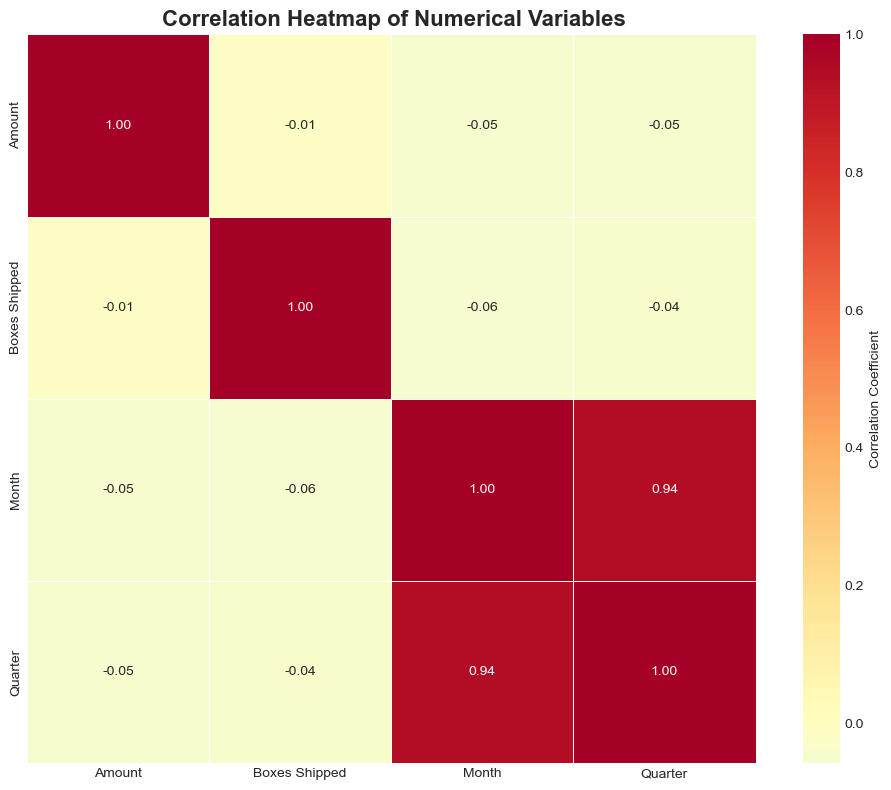


 HEATMAP INTERPRETATION:
    Red = Positive correlation
    Blue = Negative correlation
    White/Light = Weak or no correlation


In [43]:
#  Correlation Heatmap with Seaborn


plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,           # Show correlation values
    cmap='RdYlBu_r',      # Red-Yellow-Blue colormap (reversed)
    center=0,             # Center colormap at 0
    fmt='.2f',            # Format to 2 decimal places
    linewidths=0.5,       # Line width between cells
    square=True,          # Make cells square
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title(' Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n HEATMAP INTERPRETATION:")
print("    Red = Positive correlation")
print("    Blue = Negative correlation")
print("    White/Light = Weak or no correlation")

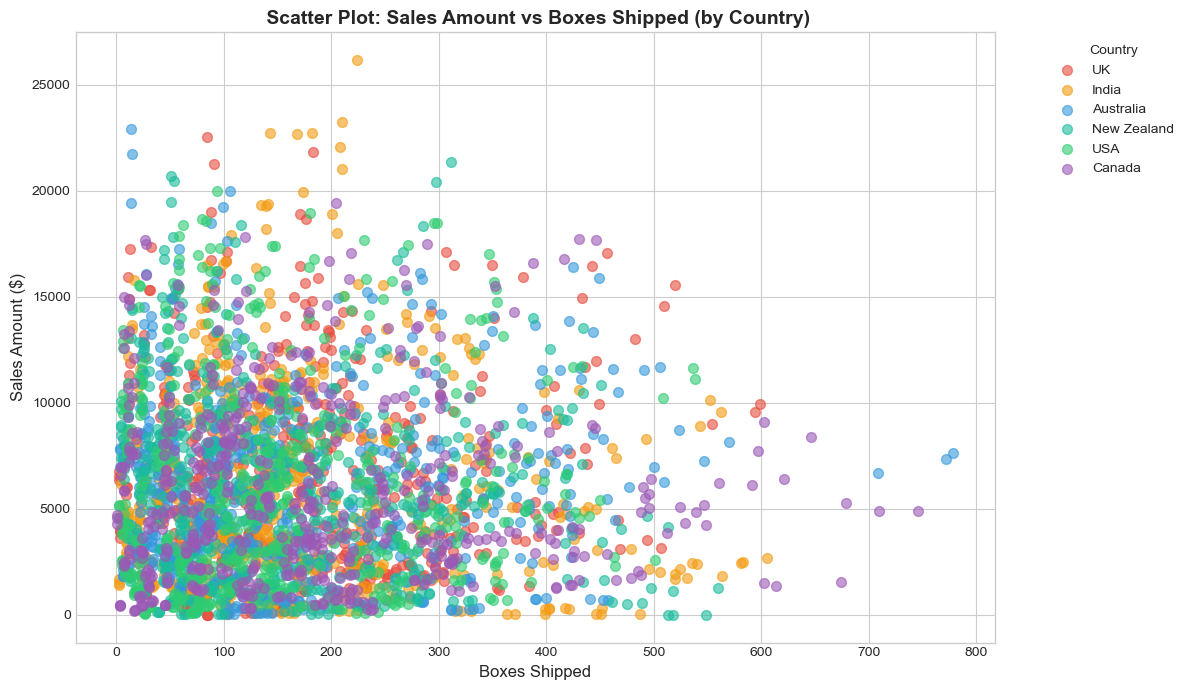


 SCATTER PLOT INTERPRETATION:
   • Each point represents a single sale transaction
   • Pattern shows relationship between quantity and revenue
   • Color coding reveals country-specific patterns


In [45]:
#  Scatter Plot: Amount vs Boxes Shipped
# Scatter plots reveal patterns in bivariate relationships
# Each point represents one sales transaction

plt.figure(figsize=(12, 7))

# Create scatter plot with different colors for each country
colors = {'Australia': '#3498db', 'UK': '#e74c3c', 'USA': '#2ecc71', 
          'India': '#f39c12', 'Canada': '#9b59b6', 'New Zealand': '#1abc9c'}

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.scatter(
        country_data['Boxes Shipped'], 
        country_data['Amount'],
        c=colors.get(country, '#95a5a6'),
        label=country,
        alpha=0.6,
        s=50
    )

plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.title(' Scatter Plot: Sales Amount vs Boxes Shipped (by Country)', fontsize=14, fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n SCATTER PLOT INTERPRETATION:")
print("   • Each point represents a single sale transaction")
print("   • Pattern shows relationship between quantity and revenue")
print("   • Color coding reveals country-specific patterns")

In [47]:
# Sales Performance by Country


print(" SALES PERFORMANCE BY COUNTRY:")
print("=" * 70)

# Group by Country and calculate aggregations
country_analysis = df.groupby('Country').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': ['sum', 'mean']
}).round(2)

# Flatten column names for readability
country_analysis.columns = ['Total_Revenue', 'Avg_Sale', 'Num_Sales', 'Total_Boxes', 'Avg_Boxes']

# Sort by total revenue
country_analysis = country_analysis.sort_values('Total_Revenue', ascending=False)
print(country_analysis)

# Identify top performer
top_country = country_analysis['Total_Revenue'].idxmax()
top_revenue = country_analysis['Total_Revenue'].max()
print(f"\n TOP PERFORMING COUNTRY: {top_country} (${top_revenue:,.2f})")

 SALES PERFORMANCE BY COUNTRY:
             Total_Revenue  Avg_Sale  Num_Sales  Total_Boxes  Avg_Boxes
Country                                                                
Australia       3646444.35   5929.18        615        99618     161.98
UK              3365388.90   6302.23        534        92523     173.26
India           3343730.83   6057.48        552        89968     162.99
USA             3313858.09   6171.06        537        81820     152.36
Canada          3078495.65   5863.80        525        95158     181.25
New Zealand     3043654.04   5864.46        519        81350     156.74

 TOP PERFORMING COUNTRY: Australia ($3,646,444.35)


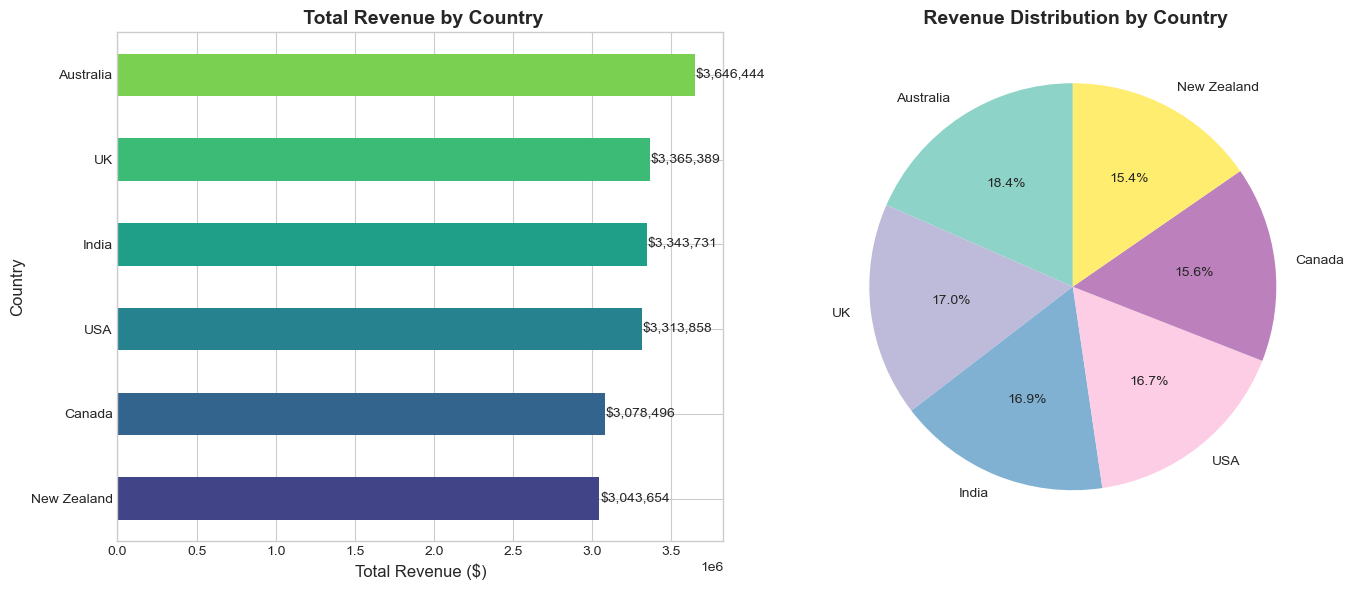

In [49]:
#  Bar Chart: Total Revenue by Country

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Total Revenue
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(country_revenue)))
country_revenue.plot(kind='barh', ax=axes[0], color=colors)
axes[0].set_xlabel('Total Revenue ($)', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)
axes[0].set_title(' Total Revenue by Country', fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(country_revenue):
    axes[0].text(v + 5000, i, f'${v:,.0f}', va='center', fontsize=10)

# Pie chart for Revenue Distribution
country_revenue_sorted = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(country_revenue_sorted)))
axes[1].pie(country_revenue_sorted, labels=country_revenue_sorted.index, autopct='%1.1f%%', 
            colors=colors_pie, startangle=90)
axes[1].set_title(' Revenue Distribution by Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

 TOP 10 PRODUCTS BY REVENUE:
Product
Smooth Sliky Salty     1120201.09
50% Dark Bites         1087659.35
White Choc             1054257.00
Peanut Butter Cubes    1036591.09
Eclairs                 996947.96
99% Dark & Pure         960033.45
85% Dark Bars           955268.24
Organic Choco Syrup     945345.73
Spicy Special Slims     938131.69
Mint Chip Choco         904989.55
Name: Amount, dtype: float64


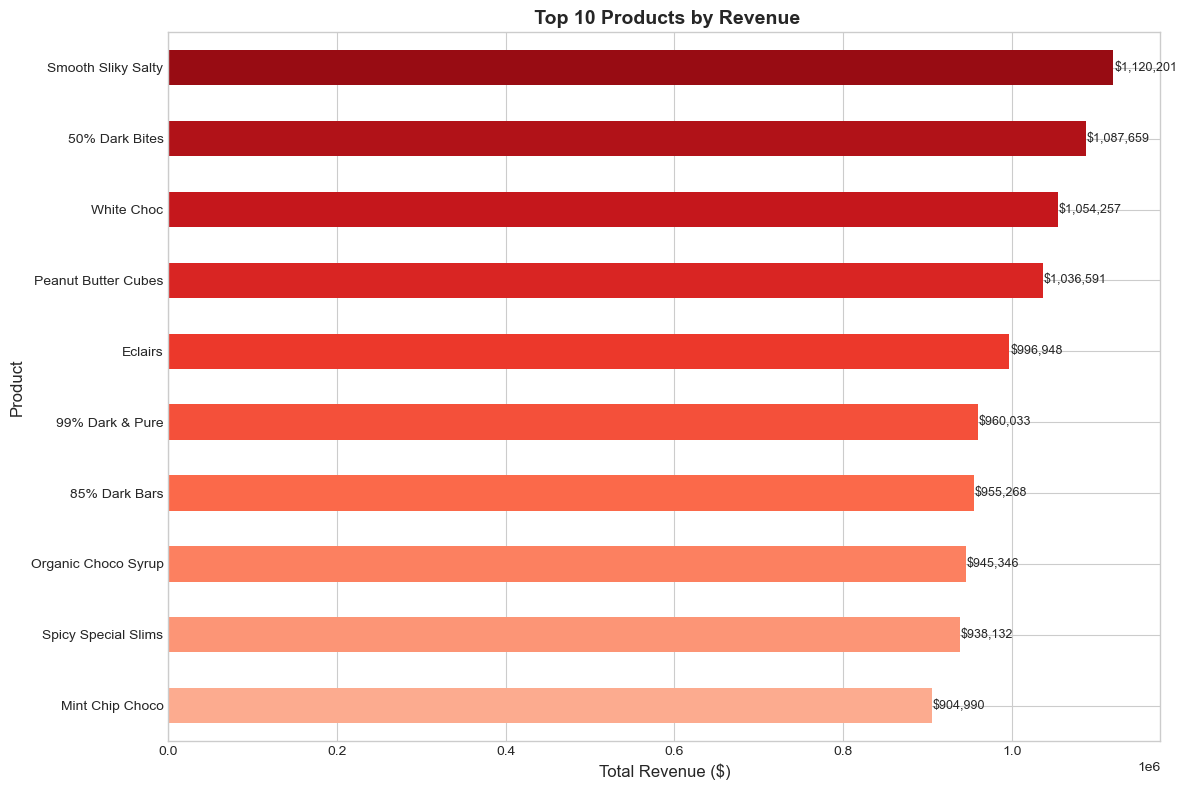

In [51]:
#  Top 10 Products by Revenue
# Identify best-selling chocolate products

print(" TOP 10 PRODUCTS BY REVENUE:")
print("=" * 60)

# Group by Product and calculate total revenue
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
top_10_products = product_revenue.head(10)
print(top_10_products)

# Visualize Top 10 Products
plt.figure(figsize=(12, 8))
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(top_10_products)))[::-1]
top_10_products.plot(kind='barh', color=colors)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.title(' Top 10 Products by Revenue', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top

# Add value labels
for i, v in enumerate(top_10_products):
    plt.text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

 TOP 10 SALES PERSONS BY REVENUE:
                         Amount  Boxes Shipped  Num_Transactions
Sales Person                                                    
Ches Bonnell         1022599.96          23070               144
Oby Sorrel           1017204.12          26390               147
Madelene Upcott      1010028.72          22199               135
Kelci Walkden        1002929.10          26605               162
Brien Boise           997326.48          24738               159
Van Tuxwell           974425.09          20627               153
Dennison Crosswaite   931849.57          26862               147
Beverie Moffet        892421.37          28027               150
Kaine Padly           849062.76          22134               135
Marney O'Breen        836427.63          24595               135


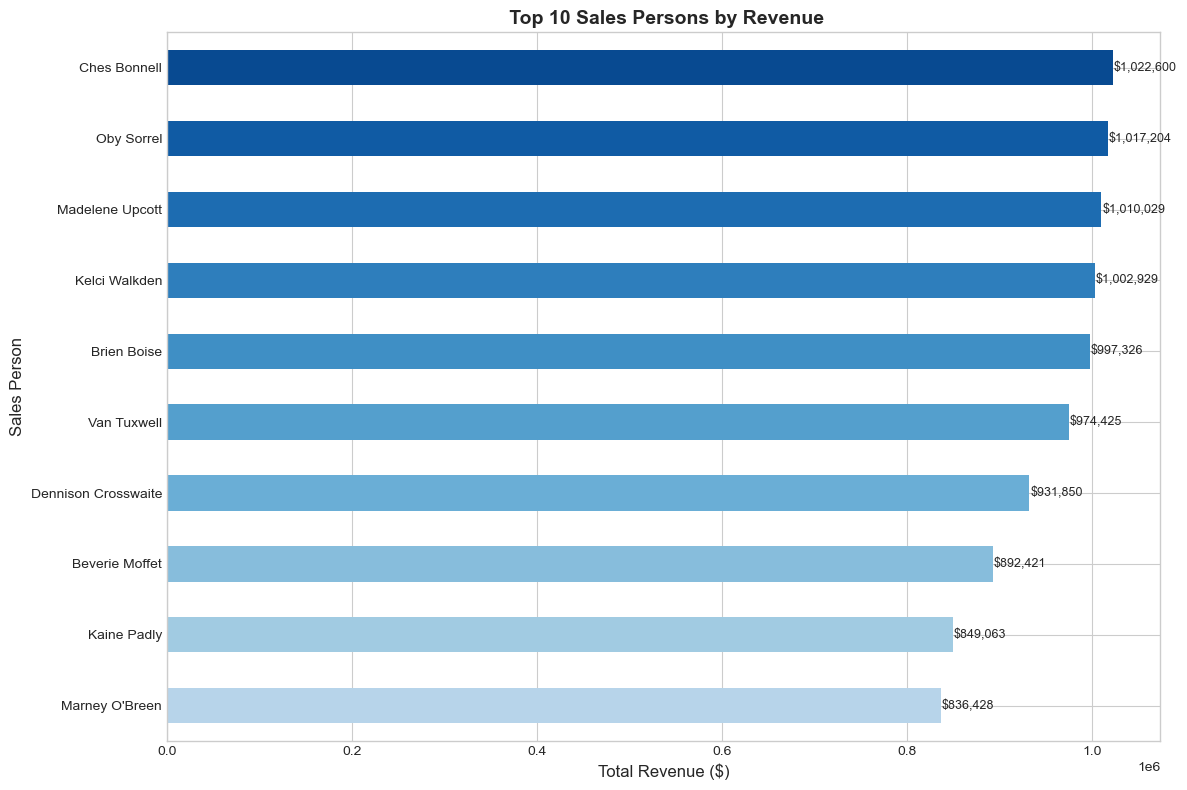


 TOP SALES PERSON: Ches Bonnell ($1,022,599.96)


In [53]:
# Top Sales Persons by Revenue
# Identify top performing sales representatives

print(" TOP 10 SALES PERSONS BY REVENUE:")
print("=" * 60)

# Group by Sales Person
sales_person_revenue = df.groupby('Sales Person').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum',
    'Product': 'count'  # Number of transactions
}).rename(columns={'Product': 'Num_Transactions'})

sales_person_revenue = sales_person_revenue.sort_values('Amount', ascending=False)
top_10_persons = sales_person_revenue.head(10)
print(top_10_persons.round(2))

# Visualize
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(top_10_persons)))[::-1]
top_10_persons['Amount'].plot(kind='barh', color=colors)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Sales Person', fontsize=12)
plt.title(' Top 10 Sales Persons by Revenue', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_10_persons['Amount']):
    plt.text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Top performer
top_person = top_10_persons.index[0]
top_amount = top_10_persons['Amount'].iloc[0]
print(f"\n TOP SALES PERSON: {top_person} (${top_amount:,.2f})")

In [55]:
#  Key Insights Summary
# all the important findings from our analysis

print("=" * 70)
print(" KEY INSIGHTS FROM CHOCOLATE SALES EDA")
print("=" * 70)

# Dataset Overview
print("\n DATASET OVERVIEW:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Date Range: {df['Date'].min().strftime('%B %Y')} to {df['Date'].max().strftime('%B %Y')}")
print(f"   • Total Revenue: ${df['Amount'].sum():,.2f}")
print(f"   • Total Boxes Shipped: {df['Boxes Shipped'].sum():,}")

# Top Performers
print("\n TOP PERFORMERS:")
top_country = df.groupby('Country')['Amount'].sum().idxmax()
top_country_rev = df.groupby('Country')['Amount'].sum().max()
print(f"   • Best Country: {top_country} (${top_country_rev:,.2f})")

top_product = df.groupby('Product')['Amount'].sum().idxmax()
top_product_rev = df.groupby('Product')['Amount'].sum().max()
print(f"   • Best Product: {top_product} (${top_product_rev:,.2f})")

top_person = df.groupby('Sales Person')['Amount'].sum().idxmax()
top_person_rev = df.groupby('Sales Person')['Amount'].sum().max()
print(f"   • Best Sales Person: {top_person} (${top_person_rev:,.2f})")

# Monthly Analysis
monthly_rev = df.groupby('Month_Name')['Amount'].sum()
best_month = monthly_rev.idxmax()
worst_month = monthly_rev.idxmin()
print(f"\n MONTHLY INSIGHTS:")
print(f"   • Best Month: {best_month} (${monthly_rev[best_month]:,.2f})")
print(f"   • Lowest Month: {worst_month} (${monthly_rev[worst_month]:,.2f})")

# Statistical Insights
print(f"\n STATISTICAL INSIGHTS:")
print(f"   • Average Sale Amount: ${df['Amount'].mean():,.2f}")
print(f"   • Median Sale Amount: ${df['Amount'].median():,.2f}")
print(f"   • Average Boxes per Sale: {df['Boxes Shipped'].mean():.0f}")

# Correlation Insight
corr = df['Amount'].corr(df['Boxes Shipped'])
print(f"   • Amount-Boxes Correlation: {corr:.3f}")

print("\n" + "=" * 70)

 KEY INSIGHTS FROM CHOCOLATE SALES EDA

 DATASET OVERVIEW:
   • Total Records: 3,282
   • Date Range: January 2022 to August 2024
   • Total Revenue: $19,791,571.86
   • Total Boxes Shipped: 540,437

 TOP PERFORMERS:
   • Best Country: Australia ($3,646,444.35)
   • Best Product: Smooth Sliky Salty ($1,120,201.09)
   • Best Sales Person: Ches Bonnell ($1,022,599.96)

 MONTHLY INSIGHTS:
   • Best Month: January ($2,868,712.59)
   • Lowest Month: April ($2,161,927.22)

 STATISTICAL INSIGHTS:
   • Average Sale Amount: $6,030.34
   • Median Sale Amount: $5,225.50
   • Average Boxes per Sale: 165
   • Amount-Boxes Correlation: -0.013

